# MATH 210 Introduction to Mathematical Computing

## March 6, 2023

* Trapezoid Rule
* Numerical Differentiation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Trapezoid Rule

Write a function called `trapezoid` which takes `f`, `a`, `b` and `N` and returns the trapezoid rule approximation for $f(x)$ for $N+1$ equally spaced points from $a$ to $b$.

In [2]:
def trapezoid(f,a,b,N):
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    I = np.sum(y[1:] + y[:-1])*dx/2
    return I

In [4]:
f = lambda x: np.sin(x)
a = 0; b = np.pi/2; N = 1;
I = trapezoid(f,a,b,N) # pi/4
I

0.7853981633974483

In [5]:
np.pi/4

0.7853981633974483

In [8]:
f = lambda x: np.sin(x)
a = 0; b = np.pi/2; N = 10000;
I = trapezoid(f,a,b,N) # Near 1.0
I

0.9999999979438324

There is a NumPy function called `np.trapz` which takes `y` and `x` and returns the corresponding trapezoid rule approximation.

In [9]:
x = np.linspace(0,np.pi/2,1001)
y = np.sin(x)
np.trapz(y,x)

0.999999794383233

## Numerical Differentiation Formulas

We need derivatives of $f(x)$ to use the numerical integration error formulas but it's a pain to compute higer order derivatives using the differentation rules. Use numerical differentiation instead. All these formulas come from Taylor series:

\begin{align*}
f(x) &= \sum_{k=0}^{\infty} \frac{f^{(k)}(a)}{k!} (x - a)^k \\
&= f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots
\end{align*}

The central difference formulas are:

$$
f'(a) \approx \frac{f(a + h) - f(a - h)}{2h}
$$

$$
f''(a) \approx \frac{f(a + h) - 2f(a) + f(a - h)}{h^2}
$$

Use the central difference formula for $f(x) = \sin(x)$ to verify it works:

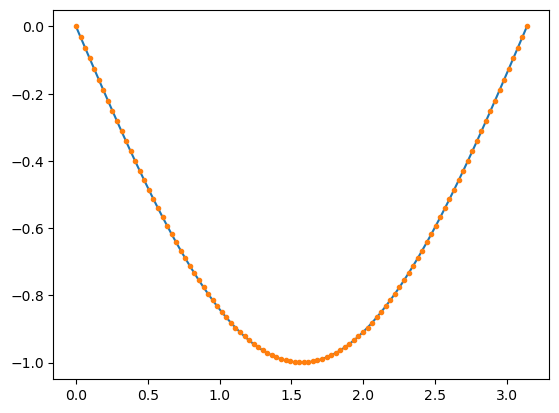

In [10]:
f = lambda x: np.sin(x)
x = np.linspace(0,np.pi,100)
h = 0.01
df = (f(x + h) - 2*f(x) + f(x - h))/h**2
plt.plot(x,df)
plt.plot(x,-np.sin(x),'.')
plt.show()

## Example

Let's find $N$ which guarantees that $E_N^T(f) \leq 0.01$ for $f(x) = \sin(\cos(x))$ on $[-\pi/2,\pi/2]$.

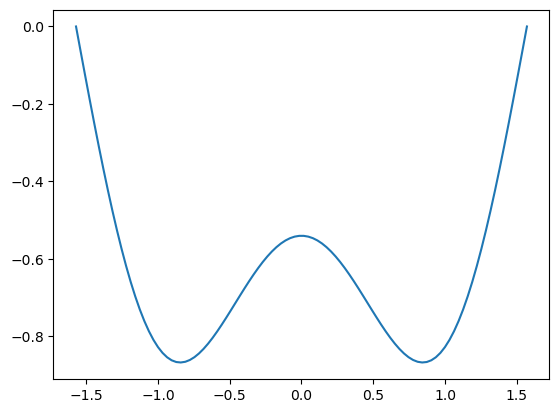

In [11]:
f = lambda x: np.sin(np.cos(x))
x = np.linspace(-np.pi/2,np.pi/2,100)
h = 0.001
d2f = (f(x + h) - 2*f(x) + f(x - h))/h**2
plt.plot(x,d2f)
plt.show()

In [12]:
np.max(np.abs(d2f))

0.8674618826587377

In [13]:
a = -np.pi/2; b = np.pi/2; K2 = 0.87;
N = np.sqrt((b - a)**3/(12*0.01)*K2)
N

14.99318198155994

In [14]:
trapezoid(f,a,b,15)

1.7791659064808991

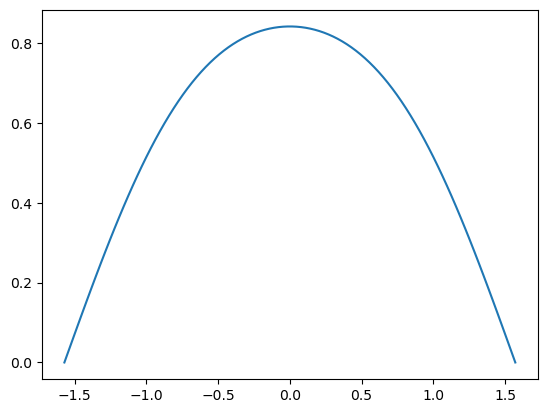

In [15]:
f = lambda x: np.sin(np.cos(x))
x = np.linspace(-np.pi/2,np.pi/2,100)
plt.plot(x,f(x))
plt.show()